In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Subscription Cohort Analysis Data.csv")

In [ ]:
df

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaN,39,month,Yes
1,149713408,2022-09-01,2022-09-02,39,month,No
2,153756284,2022-09-01,2022-09-02,39,month,No
3,121253113,2022-09-01,2022-09-23,39,month,Yes
4,154467210,2022-09-01,2023-06-29,39,month,Yes
...,...,...,...,...,...,...
3064,221145374,2023-09-07,NaN,39,month,Yes
3065,221130434,2023-09-07,NaN,39,month,Yes
3066,221189604,2023-09-08,NaN,39,month,Yes
3067,215174643,2023-09-08,NaN,39,month,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            3069 non-null   int64 
 1   created_date           3069 non-null   object
 2   canceled_date          2004 non-null   object
 3   subscription_cost      3069 non-null   int64 
 4   subscription_interval  3069 non-null   object
 5   was_subscription_paid  3069 non-null   object
dtypes: int64(2), object(4)
memory usage: 144.0+ KB


In [ ]:
df.describe()

,customer_id,subscription_cost
count,3.069000e+03,3069.0
mean,1.827553e+08,39.0
std,3.007863e+07,0.0
min,1.113945e+08,39.0
25%,1.559263e+08,39.0
50%,1.841436e+08,39.0
75%,2.142482e+08,39.0
max,2.211896e+08,39.0


In [ ]:
df.columns

Index(['customer_id', 'created_date', 'canceled_date', 'subscription_cost',
       'subscription_interval', 'was_subscription_paid'],
      dtype='object')

Converting 2 columns into Datetime

In [ ]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['canceled_date'] = pd.to_datetime(df['canceled_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            3069 non-null   int64         
 1   created_date           3069 non-null   datetime64[ns]
 2   canceled_date          2004 non-null   datetime64[ns]
 3   subscription_cost      3069 non-null   int64         
 4   subscription_interval  3069 non-null   object        
 5   was_subscription_paid  3069 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 144.0+ KB


In [ ]:
# Converting "was_subscription_paid" feild into True False instead of Yes, No
df['was_subscription_paid'].sample(8)

,was_subscription_paid
2545,Yes
1199,Yes
2362,Yes
3059,Yes
1460,Yes
2483,Yes
1749,Yes
63,Yes


In [ ]:
mapping = {"Yes":True, "No":False}
df['was_subscription_paid'] = df['was_subscription_paid'].map(mapping)

In [ ]:
df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaT,39,month,True
1,149713408,2022-09-01,2022-09-02,39,month,False
2,153756284,2022-09-01,2022-09-02,39,month,False
3,121253113,2022-09-01,2022-09-23,39,month,True
4,154467210,2022-09-01,2023-06-29,39,month,True


In [ ]:
df['subscription_interval'].value_counts()

,count
subscription_interval,
month,3069


In [ ]:
# In this the missing values indicate the number of active suscriptions
df['canceled_date'].isnull().sum()

np.int64(1065)

# Feature Enginnering

Calculationg the days of supscriptions from canceled and created date.

In [ ]:
df.columns

Index(['customer_id', 'created_date', 'canceled_date', 'subscription_cost',
       'subscription_interval', 'was_subscription_paid'],
      dtype='object')

In [ ]:
df['subscription_duration_days'] = (df['canceled_date'].fillna(pd.Timestamp.today())  - df['created_date']).dt.days

In [ ]:
df['is_active'] = df['canceled_date'].isna()

In [ ]:
# Month / Year Singup
df['singup_month'] = df['created_date'].dt.to_period('M')

In [ ]:
df

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,subscription_duration_days,is_active,singup_month
0,154536156,2022-09-01,NaT,39,month,True,1118,True,2022-09
1,149713408,2022-09-01,2022-09-02,39,month,False,1,False,2022-09
2,153756284,2022-09-01,2022-09-02,39,month,False,1,False,2022-09
3,121253113,2022-09-01,2022-09-23,39,month,True,22,False,2022-09
4,154467210,2022-09-01,2023-06-29,39,month,True,301,False,2022-09
...,...,...,...,...,...,...,...,...,...
3064,221145374,2023-09-07,NaT,39,month,True,747,True,2023-09
3065,221130434,2023-09-07,NaT,39,month,True,747,True,2023-09
3066,221189604,2023-09-08,NaT,39,month,True,746,True,2023-09
3067,215174643,2023-09-08,NaT,39,month,True,746,True,2023-09


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['customer_id'].duplicated().sum()

np.int64(192)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 3069 non-null   int64         
 1   created_date                3069 non-null   datetime64[ns]
 2   canceled_date               2004 non-null   datetime64[ns]
 3   subscription_cost           3069 non-null   int64         
 4   subscription_interval       3069 non-null   object        
 5   was_subscription_paid       3069 non-null   bool          
 6   subscription_duration_days  3069 non-null   int64         
 7   is_active                   3069 non-null   bool          
 8   singup_month                3069 non-null   period[M]     
dtypes: bool(2), datetime64[ns](2), int64(3), object(1), period[M](1)
memory usage: 174.0+ KB


1. Investigate the Duplicates of Customer_id Before Dropping.
They could be re-subscribtions

In [ ]:
duplicates = df[df.duplicated(subset=['customer_id'], keep=False)]
duplicates.sort_values(by=['customer_id', 'created_date'])

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,subscription_duration_days,is_active,singup_month
703,116060198,2022-12-13,2023-03-20,39,month,True,97,False,2022-12
1820,116060198,2023-04-24,NaT,39,month,True,883,True,2023-04
23,119436804,2022-09-03,2023-04-10,39,month,True,219,False,2022-09
2052,119436804,2023-05-21,NaT,39,month,True,856,True,2023-05
503,120738319,2022-11-14,2023-04-03,39,month,True,140,False,2022-11
...,...,...,...,...,...,...,...,...,...
3018,219065931,2023-09-03,NaT,39,month,True,751,True,2023-09
2758,219470485,2023-08-02,2023-08-16,39,month,True,14,False,2023-08
3008,219470485,2023-09-01,NaT,39,month,True,753,True,2023-09
2833,219876215,2023-08-11,2023-08-12,39,month,True,1,False,2023-08


this confirms that those "duplicates" are not duplicates in the bad-data sense, but actual churn + resubscribe events

customer_id 116060198 canceled on 2023-03-20, then signed up again on 2023-04-24.

customer_id 119436804 canceled on 2023-04-10, then signed up again on 2023-05-21.

In [ ]:
# Creating a new coulmn subscription_number  that shows the count of subscription to dsistinct from rescribers and single time subscribers.
df['subscription_number'] = df.groupby('customer_id').cumcount() + 1

Also adding another days column that shows how often people are return after canceling the subscription

In [ ]:
df['days_since_last_cancellation'] = (
    df.groupby('customer_id')['created_date'].diff().dt.days)


In [ ]:
df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,subscription_duration_days,is_active,singup_month,subscription_number,days_since_last_cancellation
0,154536156,2022-09-01,NaT,39,month,True,1118,True,2022-09,1,NaN
1,149713408,2022-09-01,2022-09-02,39,month,False,1,False,2022-09,1,NaN
2,153756284,2022-09-01,2022-09-02,39,month,False,1,False,2022-09,1,NaN
3,121253113,2022-09-01,2022-09-23,39,month,True,22,False,2022-09,1,NaN
4,154467210,2022-09-01,2023-06-29,39,month,True,301,False,2022-09,1,NaN


# EDA

In [ ]:
# Basic Dataset Understanding

In [ ]:
total_customers = df['customer_id'].nunique()
print(f"Total Unique customers count: {total_customers}")

total_subscriptions = len(df)
print(f"Total subscriptions: {total_subscriptions}")

repeat_customer = df[df['subscription_number'] > 1]['customer_id'].nunique()
print(f"Repeat Customers Count: {repeat_customer}")

pect_of_repeat = round((repeat_customer / total_subscriptions) * 100)
print(f"Percentage of Repeated Customers: {pect_of_repeat}% ")

Total Unique customers count: 2877
Total subscriptions: 3069
Repeat Customers Count: 185
Percentage of Repeated Customers: 6% 


In [ ]:
# Subscription Duration
df['subscription_duration_days'].describe()


,subscription_duration_days
count,3069.000000
mean,336.077876
std,387.660868
min,0.000000
25%,31.000000
50%,86.000000
75%,788.000000
max,1118.000000


In [ ]:
# % of subscriptions with duration  < 7 days

short_duration_count = (df['subscription_duration_days'] < 7).sum()
total_subscriptions = len(df)
print(f"Number of subscriptions less than 7 days: {short_duration_count}")

if total_subscriptions > 0:
  perct_short_days = (short_duration_count / total_subscriptions) * 100
else:
  perct_short_days = 0
print(f"Percentage of short-duration subscriptions: {perct_short_days:.2f}%")

Number of subscriptions less than 7 days: 323
Percentage of short-duration subscriptions: 10.52%


In [ ]:
percentages = (df['was_subscription_paid'].value_counts(normalize=True) * 100).map('{:.0f}%'.format)
print(percentages)

was_subscription_paid
True     96%
False     4%
Name: proportion, dtype: object


In [ ]:
# singup of per month
df['singup_month'].value_counts().sort_index()

,count
singup_month,
2022-09,217
2022-10,196
2022-11,189
2022-12,230
2023-01,273
2023-02,275
2023-03,266
2023-04,223
2023-05,285


In [ ]:
# Cancellations per Month count of each month
df.dropna(subset=['canceled_date'])['canceled_date'].dt.to_period('M').value_counts().sort_index()

,count
canceled_date,
2022-09,33
2022-10,81
2022-11,109
2022-12,123
2023-01,149
2023-02,171
2023-03,224
2023-04,194
2023-05,215


Crunch Analysis

In [ ]:
# Find when customers are dropping off.
churn_rate = 1 - df['is_active'].mean()
print(f"Churn Rate: {churn_rate * 100:.2f}%")

Churn Rate: 65.30%


In [ ]:
# Churn by Subscription Number
churn_by_subscription = (
    1 - df.groupby('subscription_number')['is_active'].mean()) * 100
print(churn_by_subscription)

subscription_number
1    67.327077
2    36.216216
3     0.000000
Name: is_active, dtype: float64


<Axes: >

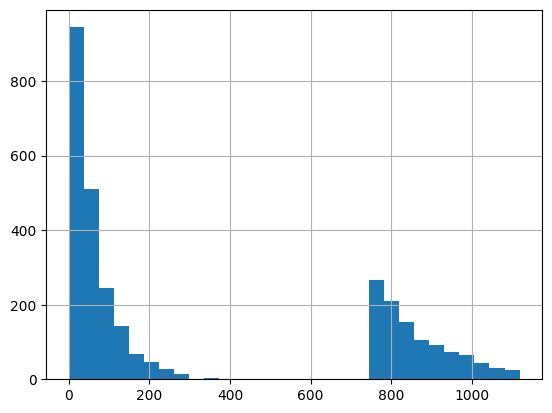

In [ ]:
# Distribution of Subscription Duration
df['subscription_duration_days'].hist(bins=30)

In [ ]:
# Check if most churn happens early (common in subscription businesses)
early_churn = (df['subscription_duration_days'] <= 7).mean()
print(f"\nEarly Churn (<=7 days): {early_churn * 100:.2f}%")


Early Churn (<=7 days): 10.95%


Reactivation Analysis

In [ ]:
# Study returning customers.
df[df['subscription_number'] > 1]['days_since_last_cancellation'].describe()

,days_since_last_cancellation
count,192.000000
mean,108.432292
std,88.546468
min,0.000000
25%,33.750000
50%,94.500000
75%,169.250000
max,347.000000


In [ ]:
# Gap Distribution
# Look at how quickly users resubscribe (short vs long gaps)

Revenue & Payment Analysis

In [ ]:
total_revenue = df[df['was_subscription_paid']]['subscription_cost'].sum()
print(total_revenue)

114504


In [ ]:
# Average Revenue Per User (ARPU)
arpu = total_revenue / total_customers
print(f"\nAverage Revenue Per User (ARPU): ${arpu:.2f}")


Average Revenue Per User (ARPU): $39.80


In [ ]:
# Lost Revenue (Unpaid)
unpaid_loss = df[~df['was_subscription_paid']]['subscription_cost'].sum()
print(unpaid_loss)

5187


Cohort Analysis

In [ ]:
# % of users from each signup month remain subscribed in later months.
# Filtering the first-time subscribers only:
first_subscriptions = df[df['subscription_number'] == 1].copy()


In [ ]:
first_subscriptions.shape

(2877, 11)

In [ ]:
# Create a column for cohort month:
first_subscriptions['cohort_month'] = first_subscriptions['created_date'].dt.to_period('M')

In [ ]:
# Create a column for active month (month of activity):
first_subscriptions['active_month'] = first_subscriptions['created_date'] + pd.to_timedelta(first_subscriptions['subscription_duration_days'], unit='D')
first_subscriptions['active_month'] = first_subscriptions['active_month'].dt.to_period('M')

In [ ]:
# Calculate cohort index (how many months after signup they are still active):
first_subscriptions['cohort_index'] = (
    (first_subscriptions['active_month'] - first_subscriptions['cohort_month']).apply(attrgetter('n'))
)


NameError: name 'attrgetter' is not defined